In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [12]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
data_boston = load_boston()

NameError: name 'boston_dataset' is not defined

In [15]:
print(data_boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [19]:
data = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
data['MEDV'] = pd.Series(data_boston.target)

In [21]:
data.shape

(506, 14)

In [22]:
x = data.drop(['MEDV'], axis = 1)
y = data['MEDV']
# x=data.iloc[:,:-1]
# y=data.iloc[:,-1:]

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle='True')

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [24]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm = lm.fit(x_train, y_train)

In [25]:
lm.intercept_

41.93548772863638

In [26]:
y_pred = lm.predict(x_test)

In [29]:
print('Coefficients:', lm.coef_)
print("Mean squared error: %.2f" % np.mean((y_pred, y_test)))
print('Variance score: %.2f' % lm.score(x_test , y_test))

Coefficients: [-1.35530724e-01  4.83587353e-02  1.50212105e-02  2.25104601e+00
 -2.06047147e+01  3.44260147e+00  8.88277717e-03 -1.62983349e+00
  3.66989793e-01 -1.40169017e-02 -1.03172809e+00  1.05478306e-02
 -5.36378755e-01]
Mean squared error: 22.02
Variance score: 0.69


Coefficient of CRIM [-0.39966675]
MSE of CRIM 61.69413745566079
Variance of CRIM 0.18175181381685424




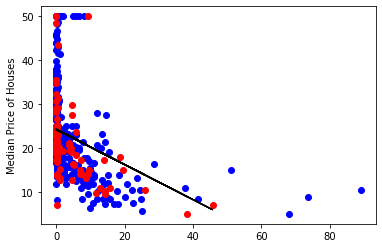

Coefficient of ZN [0.12475264]
MSE of ZN 54.34745382306917
Variance of ZN 0.2779227639787182




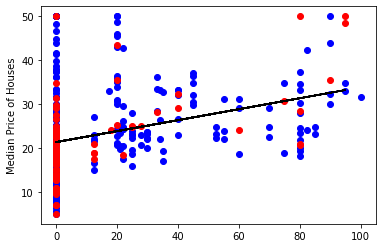

Coefficient of INDUS [-0.63690377]
MSE of INDUS 53.06374453858559
Variance of INDUS 0.28577717817423154




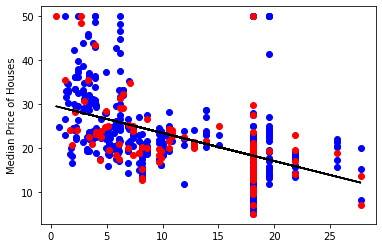

Coefficient of CHAS [6.8838069]
MSE of CHAS 74.73440525330909
Variance of CHAS 0.0011668478037144547




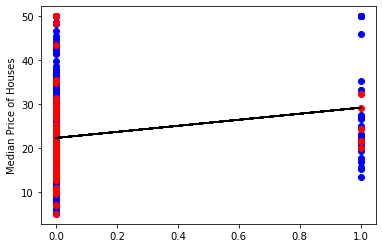

Coefficient of NOX [-32.96398015]
MSE of NOX 58.28532593239761
Variance of NOX 0.240151639939314




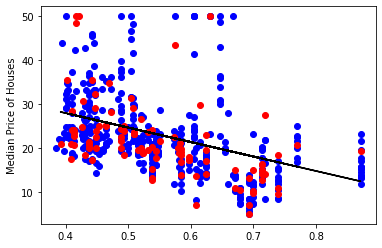

Coefficient of RM [9.34830141]
MSE of RM 46.144775347317264
Variance of RM 0.37102890079059914




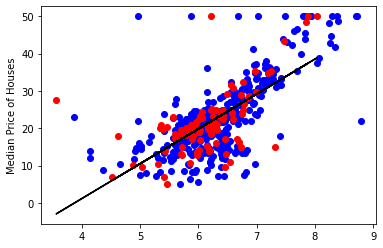

Coefficient of AGE [-0.11341158]
MSE of AGE 55.73258162067601
Variance of AGE 0.26298620162673336




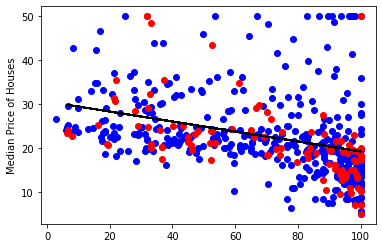

Coefficient of DIS [1.0295094]
MSE of DIS 67.95691932803948
Variance of DIS 0.09432572742294165




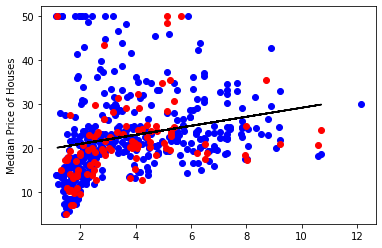

Coefficient of RAD [-0.4209564]
MSE of RAD 65.65174251079492
Variance of RAD 0.1159308621229308




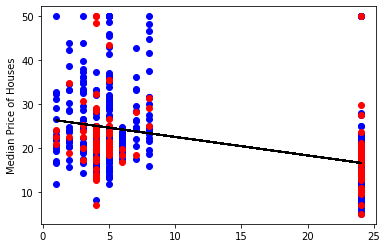

Coefficient of TAX [-0.02582177]
MSE of TAX 55.63802986480275
Variance of TAX 0.24938201080878641




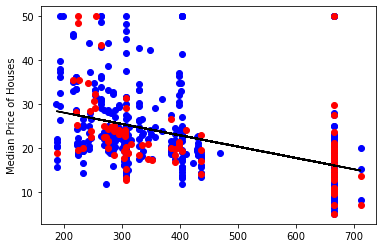

Coefficient of PTRATIO [-2.05682316]
MSE of PTRATIO 49.97637788483697
Variance of PTRATIO 0.31862299905341485




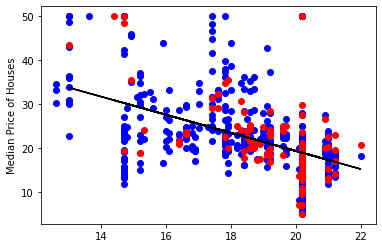

Coefficient of B [0.03464325]
MSE of B 68.31741207661821
Variance of B 0.09423457016909687




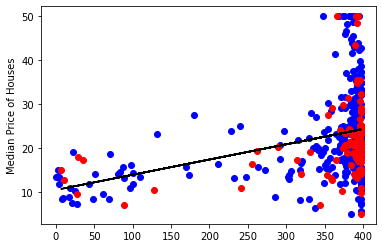

Coefficient of LSTAT [-0.9665309]
MSE of LSTAT 33.51954917268488
Variance of LSTAT 0.5447839425335899




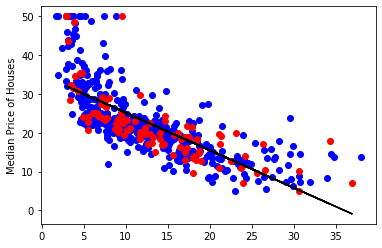

In [30]:
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

data_columns = x.columns.tolist()
for col in data_columns:
    X = data[col]
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    lmn_1 = lm.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = lmn_1.predict(X_test.values.reshape(-1,1))
    
    mse_1 = mean_squared_error(y_test, y_pred)
    variance_1 = explained_variance_score(y_test, y_pred)
    print("Coefficient of",col, lmn_1.coef_)
    print("MSE of",col, mse_1)
    print("Variance of", col, variance_1)
    print('\n')

    
    plt.scatter(X_train,y_train, color='blue')
    plt.scatter(X_test,y_test, color='red')
    plt.plot(X_test,y_pred,color='black')
    plt.xlabel('')
    plt.ylabel('Median Price of Houses')
    plt.show()

# list = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# for i in list:
#     X = boston[i]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     clf = lm.fit(X_train.values.reshape(-1, 1), y_train)
#     y_pred = clf.predict(X_test.values.reshape(-1,1))
#     mse = mean_squared_error(y_test, y_pred)
#     variance = explained_variance_score(y_test, y_pred)
#     print("Coefficient of",i, clf.coef_)
#     print("MSE of",i, mse)
#     print("Variance of", i, variance)
#     print()
    

## Q3

In [31]:
mse_list = []
variance_list = []
total_mse =0
total_vs = 0
count = 0

data_columns = x.columns.tolist()
for j in data_columns:
    mse_v = []
    vs_v = []
    for i in range(10):
        count+=1
        X = data.drop(['MEDV'], axis = 1)
        y = data['MEDV']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle='True')
        lmn_2 = lm.fit(X_train, y_train)
        y_pred = lmn_2.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        total_mse += mse

        variance = explained_variance_score(y_test, y_pred)
        total_vs += variance

        lmn_2.fit(X_train[j].to_numpy().reshape(-1,1), y_train)
        y_test_pred = lmn_2.predict(X_test[j].to_numpy().reshape(-1,1))
        mse_1 = mean_squared_error(y_test, y_test_pred)
        vs_1 = explained_variance_score (y_test, y_test_pred)
        mse_v.append(mse_1)   
        vs_v.append(vs_1)
        print("MSE of",j, mse_1)
        print("Variance of", j, vs_1)
    
    print()
    print("AVERAGE MSE for",j,"is",sum(mse_v)/len(mse_v))
    mse_list.append(sum(mse_v)/len(mse_v))
    print("AVERAGE Variance for",j,"is",sum(vs_v)/len(vs_v))
    variance_list.append(sum(vs_v)/len(vs_v))
    print()
    print('----------------------------------------------------')
print()
print("AVERAGE MSE for all features", (total_mse/count))
mse_list.append((total_mse/count))
print("AVERAGE Variance for all features", (total_vs/count))
variance_list.append((total_vs/count))
print()

MSE of CRIM 87.69251899319384
Variance of CRIM 0.15593158994216305
MSE of CRIM 72.0683889871634
Variance of CRIM 0.06870637111087363
MSE of CRIM 86.52544002275367
Variance of CRIM 0.12778358141895418
MSE of CRIM 62.467151025411525
Variance of CRIM 0.09700955195089456
MSE of CRIM 62.6354824019023
Variance of CRIM 0.16570276108794757
MSE of CRIM 75.32158403571536
Variance of CRIM 0.038650260239173284
MSE of CRIM 71.24179541680428
Variance of CRIM 0.19161940131740007
MSE of CRIM 89.71861002941206
Variance of CRIM 0.13528142671122378
MSE of CRIM 91.5813982006709
Variance of CRIM 0.14332970826404234
MSE of CRIM 57.308332519164104
Variance of CRIM 0.18970861549133955

AVERAGE MSE for CRIM is 75.65607016321914
AVERAGE Variance for CRIM is 0.13137232675340121

----------------------------------------------------
MSE of ZN 59.54976312402163
Variance of ZN 0.15666018066484666
MSE of ZN 94.01131771731349
Variance of ZN 0.05248783552277725
MSE of ZN 68.4940404759064
Variance of ZN 0.10437849431259

C:\Users\anush\AppData\Local\Temp/ipykernel_3512/2346811563.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns.tolist(), rotation = 45)


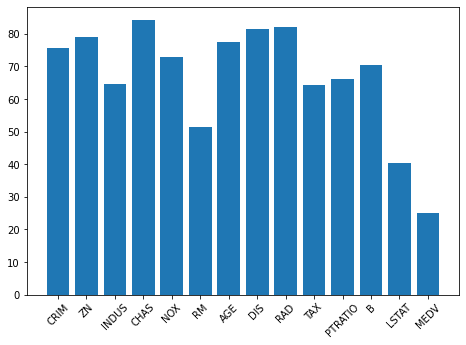

In [32]:
#Plot for MSE V/S FEATURE PLOT

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data.columns.tolist(),mse_list)
ax.set_xticklabels(data.columns.tolist(), rotation = 45)
plt.show()

C:\Users\anush\AppData\Local\Temp/ipykernel_3512/1587693246.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns.tolist(), rotation = 45)


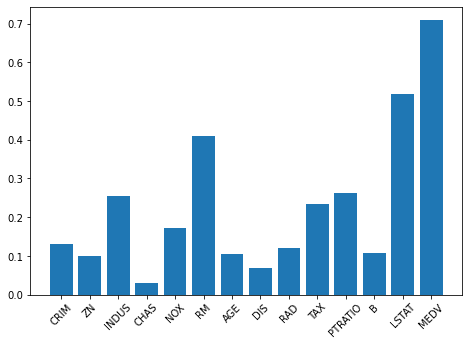

In [33]:
#Plot for VARIANCE V/S FEATURE PLOT

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data.columns.tolist(),variance_list)
ax.set_xticklabels(data.columns.tolist(), rotation = 45)
plt.show()

## Conceptual Questions

1. By paying closing attention we can see that LSTAT is the most predicitive for the target feature. From the 13 plots we generated for all the individual features LSTAT has the one of the least Mean Squared Error of 33.519 and a high variance of 0.544 suggesting us that LSTAT is the most predictive. 


2. I would choose RM and LSTAT. If we focus our attention towards the part of this book where we performed 10 iterartions for each feature and obtained their averages we can see that RM has the least Mean Squared Variance of 33.24 and a high variance of 0.513 which is a very good choice to predict our target. The other feature LSTAT also has a very low MSE and high Variance making it a good choice. 


3. From all the individual plots we have generated for each feature let us discuss some details,

- For feature 'CRIM' we can see that when the crimes are less the value of the houses are very high. As the crime rates increase the value of the houses drastically fall. This is very clear as to why it affects the house value. Places with better security systems are expensive.

- For "NOX" the linear model does not fit at all. The scatter plots are on the edges of the plot.

- The feature "RM" has one of the lowest Mean Squared Errors and high variance values. Indicating that they are a good fit for predicitng the target. "RM" also impacts the house cost as more number of rooms mean higher price for the house.

- Another intersting feature is the LSTAT. It is one of the best features to be used if we want to predict the target feature. 

- From the MSE v/s Feature plot it is evident that RM and LSTAT have the least MSE. CHAS, DIS and, B have the highest MSE. So the above 3 would be the worst models to predict our target. 

- Likewise in plot Variance v/s Features, we can see tha RM and LSTAT have the highest variance and CHAS, DIS and B have the least.

## References

https://amitg0161.medium.com/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/